![Workflow](https://files.slack.com/files-pri/T25783BPY-F5XB4JW5D/workflow.png?pub_secret=2ce52c9fab)

# Step1 - Data Analytics Workflow
### Boston Housing: Predicting Boston Housing Prices(https://www.kaggle.com/samratp/boston-housing-prices-evaluation-validation)
#### Study general workflow for Predictive Analytics with Boston Housing Dataset

# Learning Plan

### Lesson 1-1: Overview - Data Analytics Workflow

### Lesson 1-2: Exploratory Data Analysis

### Lesson 1-3: Preprocessing

### Lesson 1-4: Model Selection

### Lesson 1-5: Model Evaluation & Prediction


# Lesson 1-1: Overview - Data Analytics Workflow

## Data Science vs. Data Analytics

![](https://www.gangboard.com/blog/wp-content/uploads/2019/02/difference-between-data-science-and-data-analytics.png)
[reference blog](https://www.gangboard.com/blog/difference-between-data-science-and-data-analytics/)

## Data Science is Multidisciplinary

![](https://www.simplilearn.com/ice9/free_resources_article_thumb/Data-Science-vs.-Data-Analytics-vs.-Machine-Learning1.jpg)

[referencde blog](https://www.simplilearn.com/data-science-vs-data-analytics-vs-machine-learning-article)

## <font color="blue">Data Science</font> can be seen as an incorporation of multiple parental disciplines, 
## including <font color="green">data analytics</font>, software engineering, data engineering, machine learning, predictive analytics, business analytics, and more. 

## What is Data Analytics?

## <font color="green">Data Analytics</font> refers to the statistical analysis of data to come up with business-essential information and solve problems. The process may comprise of cleaning, transformation, and modeling of data.

## Three types of Data Analytics

* Descriptive Analytics
* Predictive Analytics
* Prescriptive Analytics

## Descriptive Analytics

It refers to building models that provide an insight in current and historical data and show the performance of the company in various areas such as finance, inventory, customers etc. However, <font color="red">it does not give insights regarding future</font>, which brings us to the second type – Predictive Analytics.

## Predictive Analytics

It is used to make informed decisions utilizing historical data such as which type of customers to target or which product can be more profitable.

## Prescriptive Analytics

It is about providing advice and knowledge-based proposals to make better decisions on the possible outcomes and optimizing production, inventory, marketing approach, etc.

## 3가지 type 중에서 Predictive Analytics 에 대해서 알아 본다.

## Workflow for Predictive Analytics

일반적인 예측 분석 프로젝트(Predictive Analytics)는 다음과 같은 프로세스를 따른다.

![Workflow](https://files.slack.com/files-pri/T25783BPY-F5XB4JW5D/workflow.png?pub_secret=2ce52c9fab)


### 1단계 : 탐색적 자료 분석 (EDA : Exploratory Data Analysis)

시각화와 기술 통계(Descriptive statistics)를 통해서 데이터를 이해하는 단계이다.

### 2단계 : 전처리 (Preprocessing)

데이터를 정제하고 가공해서 머신 러닝 모델의 입력에 적합한 형태로 바꿔주는 단계이다.

- Data Cleaning
  - Deduplication
  - Outlier detection
  - Other cleaning techniques

- For model
  - Feature extraction
  - Feature scaling
  - Dummification
  - Dimensionality reduction

탐색적 자료 분석과 전처리는 순차적이라기 보다 반복적인 관계이다. EDA를 통해 어떤 전처리가 필요한지 알 수 있고 전처리를 통해 EDA를 수월하게 할 수 있다.

### 3단계 : 모델 선택 (Model selection)

적절한 머신 러닝 모델을 선택하는 단계이다.

- 무엇을 선택할 것인가
  - Model
  - Features
  - Hyperparameters


- 어떻게 선택할 것인가
  - Metrics
  - Validation
  - Cross Validation (CV)


### 4단계 : 평가 및 예측 (Evaluation & Prediction)

만들어진 머신 러닝 모델의 성능을 평가하고 모델을 활용하여 새로운 데이터에 대한 예측을 하는 단계이다.

- 만들어진 모델이 얼마나 새로운 데이터에 대해 얼마나 일반화 (generalization) 가능한지 측정할 수 있다.
- 평가용 데이터셋은 모델 선택과 학습 과정에서 쓰이지 않아야 한다.
- 평가용 데이터셋은 학습용 데이터셋과 동일한 전처리 과정을 거쳐야 한다.


## Workflow Example

이 예제에서는 보스턴 집값 데이터를 단순한 방식으로 예측하는 프로젝트를 Workflow에 맞춰서 수행해 본다.


### Load Data

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [2]:
import pandas as pd
data = pd.DataFrame(boston.data, columns=boston.feature_names)


In [3]:
data['MEDV'] = boston.target

MEDV 값이 우리가 예측하려는 집값이다.



먼저, 모델의 평가를 위해 학습용 데이터셋(Training dataset)과 평가용 데이터셋(Test dataset)을 나눈다.

In [4]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data)

파이썬의 머신 러닝 라이브러리인 scikit-learn에서 제공하는 함수를 사용했다. 이 함수가 하는 역할은 단순히 데이터셋를 무작위로 둘로 쪼개 주는 것이다. 이 때 비율은 평가용 데이터셋이 25%를 차지하도록 했다. 기본값이 25%이므로 생략해도 결과는 같다.

# Lesson 1-2: Exploratory Data Analysis

## 전처리 (Preprocessing)

### 변수 살펴보기

In [5]:
train_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
180,0.06588,0.0,2.46,0.0,0.488,7.765,83.3,2.7410,3.0,193.0,17.8,395.56,7.56,39.8
225,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
68,0.13554,12.5,6.07,0.0,0.409,5.594,36.8,6.4980,4.0,345.0,18.9,396.90,13.09,17.4
254,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57,21.9
224,0.31533,0.0,6.20,0.0,0.504,8.266,78.3,2.8944,8.0,307.0,17.4,385.05,4.14,44.8


### 변수 하나에 대해 그래프 그리기

In [6]:
%matplotlib inline

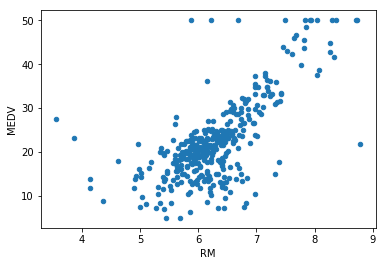

In [7]:
train_data.plot.scatter(x='RM', y='MEDV')

In [8]:
import cufflinks
cufflinks.go_offline()

In [9]:
train_data.RM.iplot(kind='hist')

RM 변수는 3.5 ~ 8.7 사이에 있다는 것을 알 수 있다.

In [10]:
train_data.MEDV.iplot(kind='hist')

MEDV 변수는 5 ~ 50 사이에 있다.

### 두 변수 간의 관계 보기

RM과 MEDV 사이의 관계 보기

In [11]:
train_data.iplot(x='RM', y='MEDV', mode='markers')

### 여러 변수 간의 관계 보기

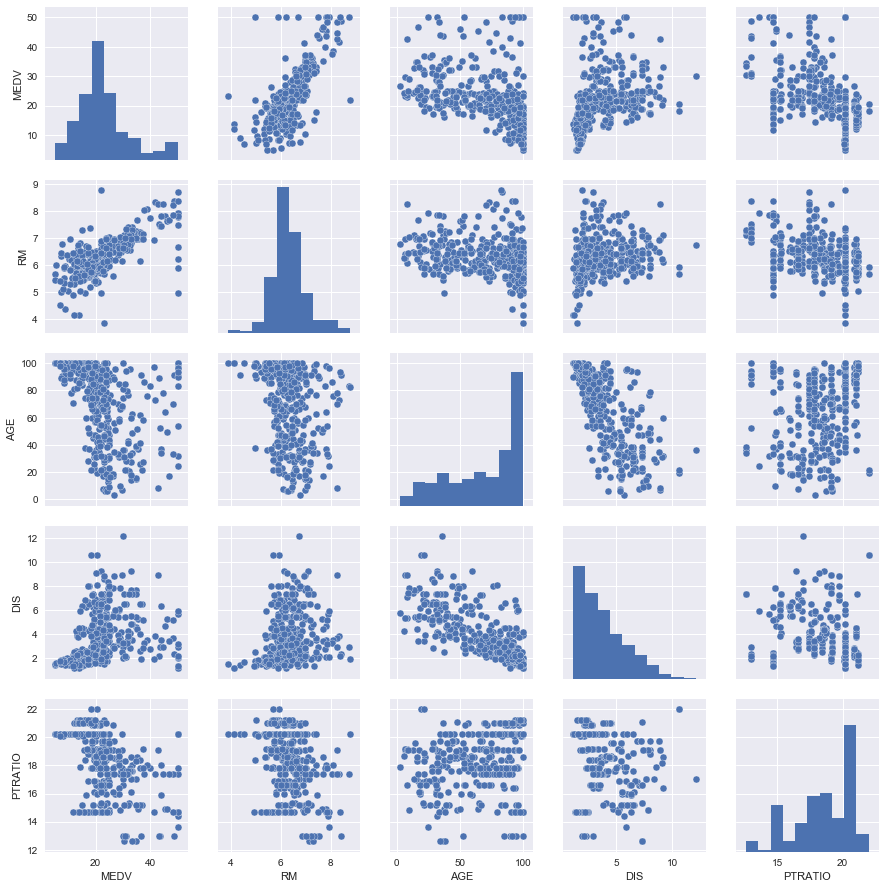

In [166]:
%matplotlib inline
import seaborn as sns

sns.pairplot(train_data[["MEDV", "RM", "AGE", "DIS", "PTRATIO"]]);

# Lesson 1-3: 전처리 (Preprocessing)

## 전처리 (Preprocessing)

이 데이터셋은 잘 정제된 데이터셋이기 때문에 중복된 값이나 불량 데이터가 없다. 따라서 여기서는 Feature scaling 정도의 간단한 전처리만을 수행해보자.



### Feature scaling

- 0~1 사이에 맞추기
    - 최솟값을 빼고 (최댓값 - 최솟값)으로 나눈다.
    - 최댓값은 1이 되고, 최솟값은 0이 된다.
- 표준화(Standardization)하기
    - 평균을 빼고 표준편차로 나눈다.
    - 원래 분포가 정규분포인 경우 평균이 0이고 표준편차가 1인 표준정규분포로 바뀐다.
    - 대부분의 값이 -2 ~ 2 사이에 위치한다.



이 예시에서는 표준화(Standardization)를 쓴다.

학습 데이터셋의 전처리 과정에서 사용한 매개변수(parameter)는 테스트에서 동일하게 사용해야 한다. 이 예시에서는 학습 데이터셋에서 구한 변수의 평균과 표준편차를 저장해놓고 테스트에서 동일하게 사용할 것이다.

In [151]:
train_data.RM.std()

0.699284575662205

### Standardization

In [13]:
RM_mean = train_data.RM.mean()
RM_std = train_data.RM.std()

MEDV_mean = train_data.MEDV.mean()
MEDV_std = train_data.MEDV.std()

processed_data = (train_data
                  .assign(RM_standard = lambda x: (x.RM - RM_mean)/RM_std)
                  .assign(MEDV_standard = lambda x: (x.MEDV - MEDV_mean)/MEDV_std)
                 )
processed_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RM_standard,MEDV_standard
180,0.06588,0.0,2.46,0.0,0.488,7.765,83.3,2.7410,3.0,193.0,17.8,395.56,7.56,39.8,2.057247,1.912253
225,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0,3.380159,3.028507
68,0.13554,12.5,6.07,0.0,0.409,5.594,36.8,6.4980,4.0,345.0,18.9,396.90,13.09,17.4,-0.934463,-0.539127
254,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57,21.9,-0.226154,-0.046662
224,0.31533,0.0,6.20,0.0,0.504,8.266,78.3,2.8944,8.0,307.0,17.4,385.05,4.14,44.8,2.747642,2.459437


# Lesson 1-4: Model Selection

## 모델 선택 (Model selection)

예측 모델은 생각할 수 있는 가장 간단한 모델을 사용한다. 즉, RM_standard 값의 $\theta_1$배가 MEDV_standard라고 예측한다. $\theta_1$은 1.2로 정한다. 나중에는 이 값을 사람이 직접 정하지 않고 머신 러닝 알고리즘을 이용해 학습하는 방법을 소개할 것이다.

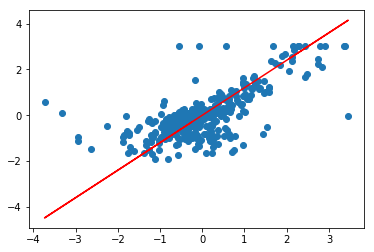

In [14]:
from matplotlib import pyplot as plt
import numpy as np

x = processed_data.RM_standard
y = processed_data.MEDV_standard
theta_1 = 1.2
y_hat = theta_1 * x

plt.scatter(x=x, y=y)
plt.plot(x, y_hat, 'r');

# Lesson 1-5: Model Evaluation & Prediction

## 평가 및 예측 (Evaluation & Prediction)

모델의 평가는 모델이 학습된 학습용 데이터셋이 아니라 모델이 아직 보지 못한 평가용 데이터셋으로 한다. 모델이 새로운 데이터에 대해 얼마나 일반화하여 적용할 수 있는지 평가하는 것이 목적이기 때문이다.

먼저, 평가용 데이터셋을 학습용 데이터셋과 동일한 방식으로 전처리하여야 한다. 이 때 파라미터들은 학습용 데이터셋에서 구한 값을 사용한다.

In [15]:
processed_test_data = (test_data
                  .assign(RM_standard = lambda x: (x.RM - RM_mean)/RM_std)
                  .assign(MEDV_standard = lambda x: (x.MEDV - MEDV_mean)/MEDV_std)
                 )
processed_test_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RM_standard,MEDV_standard
235,0.33045,0.0,6.20,0.0,0.507,6.086,61.5,3.6519,8.0,307.0,17.4,376.75,10.88,24.0,-0.256471,0.183155
311,0.79041,0.0,9.90,0.0,0.544,6.122,52.8,2.6403,4.0,304.0,18.4,396.90,5.98,22.1,-0.206861,-0.024775
196,0.04011,80.0,1.52,0.0,0.404,7.287,34.1,7.3090,2.0,329.0,12.6,396.90,4.08,33.3,1.398547,1.200915
66,0.04379,80.0,3.37,0.0,0.398,5.787,31.1,6.6115,4.0,337.0,16.1,396.90,10.24,19.4,-0.668502,-0.320254
154,1.41385,0.0,19.58,1.0,0.871,6.129,96.0,1.7494,5.0,403.0,14.7,321.02,15.12,17.0,-0.197215,-0.582902


전처리된 평가용 데이터셋을 이용해 우리가 예측하고자 하는 변수의 예측값을 만든다.

In [16]:
x_test = processed_test_data.RM_standard
y_test = processed_test_data.MEDV_standard
y_hat_test = theta_1 * x_test

모델을 평가하기 위해서는 기준이 필요하다. 회귀 문제(Regression problem)에서 가장 널리 쓰이는 평가 방법은 잔차 제곱의 합(RSS: Residual Sum of Squares)이다. 잔차 제곱의 합을 계산하는 방법은 실제값과 예측값의 차이를 제곱하여 모두 더하는 것이다. 여기서는 데이터 갯수에 따른 차이를 피하기 위해 RSS를 데이터 갯수로 나누어준다. 또한 그 값을 다시 2로 나눈다. (2로 나누는 이유는 계산을 쉽게 하기 위해서임).

$$RSS = \frac{1}{2n}\sum^n_{i=1} (y^{(i)} - \hat{y}^{(i)})^2$$

먼저, 학습용 데이터셋에서의 RSS를 구해보면 다음과 같다.

In [17]:
residual = y - y_hat
n = len(x)
RSS = 1/(2*n) * (residual ** 2).sum()
RSS

0.3844156938567932

이제 평가용 데이터셋에서의 RSS를 구해보자.

In [18]:
residual_test = y_test - y_hat_test
n_test = len(x_test)
RSS_test = 1/(2*n_test) * (residual_test ** 2).sum()
RSS_test

0.3174147481711519

학습용 데이터셋에서의 지표와 평가용 데이터셋에서의 지표 간의 차이는 나중에 모델의 성능을 이해하는 데 중요한 역할을 할 것이다.

In [19]:
train_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
180,0.06588,0.0,2.46,0.0,0.488,7.765,83.3,2.7410,3.0,193.0,17.8,395.56,7.56,39.8
225,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
68,0.13554,12.5,6.07,0.0,0.409,5.594,36.8,6.4980,4.0,345.0,18.9,396.90,13.09,17.4
254,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57,21.9
224,0.31533,0.0,6.20,0.0,0.504,8.266,78.3,2.8944,8.0,307.0,17.4,385.05,4.14,44.8


In [20]:
from plotly.offline import iplot_mpl, plot_mpl, iplot

In [21]:
import seaborn as sns

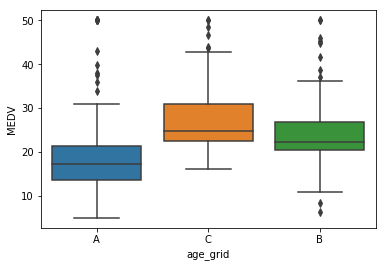

In [22]:
df = train_data.assign(age_grid = lambda x: x.AGE.map(lambda x: 'A' if x > 80 else 'B' if x > 40 else 'C'))
s = sns.boxplot(x=df['age_grid'], y=df['MEDV'])

In [23]:
iplot_mpl(s.figure)